<a href="https://colab.research.google.com/github/veronica1908/FINANZAS_E4_AIII/blob/main/b_Limpieza_Transformacion_A_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Módulo 4. Aplicaciones de la analítica en las finanzas

CÉSAR IVÁN ÁVILA DÍAZ

VERÓNICA ANDREA MORALES GONZÁLEZ

Analítica 3

2024-1

REPOSITORIO: https://github.com/veronica1908/FINANZAS_E4_AIII

#Paquetes y librerías

In [29]:
# Instalar bibliotecas necesarias
!pip install sqlalchemy
!pip install mysql-connector-python
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.3 MB/s eta 0:00:00


In [30]:
# Importar bibliotecas
import pandas as pd
import sqlite3
import plotly.graph_objects as go
import plotly.express as px
from sqlalchemy import create_engine
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

# Carga y visualización de los datos

In [24]:
# Cargar la base de expuestos
bd_expuestos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/FINANZAS_E4_AIII/main/BD_Expuestos.txt', sep='\t', header=0, encoding='latin1')

# Cargar la base sociodemográfica
bd_sociodem = pd.read_csv('https://raw.githubusercontent.com/veronica1908/FINANZAS_E4_AIII/main/BD_Sociodemograficas.txt', sep='\t', header=0, encoding='latin1')

# Cargar la base de siniestros
#bd_siniestros = pd.read_csv('', sep='\t', header=None, encoding='latin1')


In [22]:
#Visualizamos la base de EXPUESTOS

print('Existen en total ', len(bd_expuestos.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de usuarios:")
print(bd_expuestos.head())

print("\nInformación de la base de usuarios:")
print(bd_expuestos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = bd_expuestos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  5 columnas en la base de datos.

Primeras filas de la base de usuarios:
   Asegurado_Id  Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  \
0      16286173            125696117   2018/01/01        2018/04/10   
1      11885152            141320760   2018/01/01               NaN   
2        763957            162532851   2018/01/01               NaN   
3      29082204            154620473   2018/01/01        2018/04/19   
4       4567640             93633862   2018/01/01               NaN   

    FECHA_FIN  
0  2018/04/10  
1  2019/12/31  
2  2019/12/31  
3  2018/04/19  
4  2019/12/31  

Información de la base de usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Asegurado_Id         300900 non-null  int64 
 1   Poliza_Asegurado_Id  300900 non-null  int64 
 2   FECHA_INICIO         300900 non-nul

In [25]:
#Visualizamos la base SOCIODEMOGRÁFICA

print('Existen en total ', len(bd_sociodem.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de usuarios:")
print(bd_sociodem.head())

print("\nInformación de la base de usuarios:")
print(bd_sociodem.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = bd_sociodem.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  9 columnas en la base de datos.

Primeras filas de la base de usuarios:
   Asegurado_Id  Mujer FechaNacimiento    Ciudad  CANCER  EPOC  DIABETES  \
0      18686469      1      17/01/1984    Bogota       0     0         0   
1      16087775      0      12/03/1984  Medellin       0     0         0   
2      35757761      1      19/12/1993    Bogota       0     0         0   
3      48691460      0      14/11/2000    Bogota       0     0         0   
4      36074099      1       6/08/2015      Cali       0     0         0   

   HIPERTENSION  ENF_CARDIOVASCULAR  
0             0                   0  
1             0                   0  
2             0                   0  
3             0                   0  
4             0                   0  

Información de la base de usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              ----

In [26]:
#Visualizamos la base de SINIESTROS

print('Existen en total ', len(bd_siniestros.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de usuarios:")
print(bd_siniestros.head())

print("\nInformación de la base de usuarios:")
print(bd_siniestros.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = bd_siniestros.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

NameError: name 'bd_siniestros' is not defined

#Exploración inicial de las variables de las bases

                                             |          | [  0%]   00:00 -> (? left)


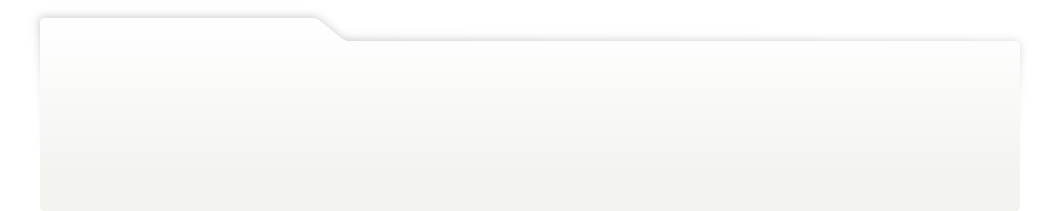
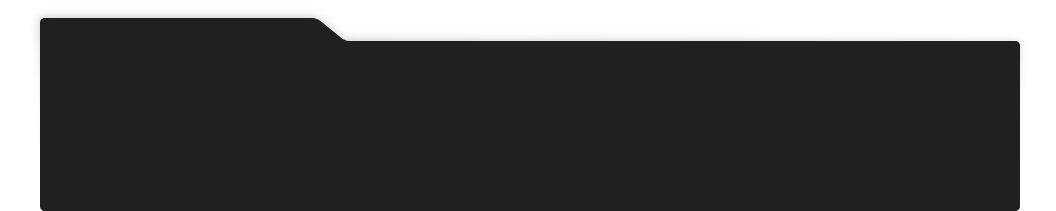
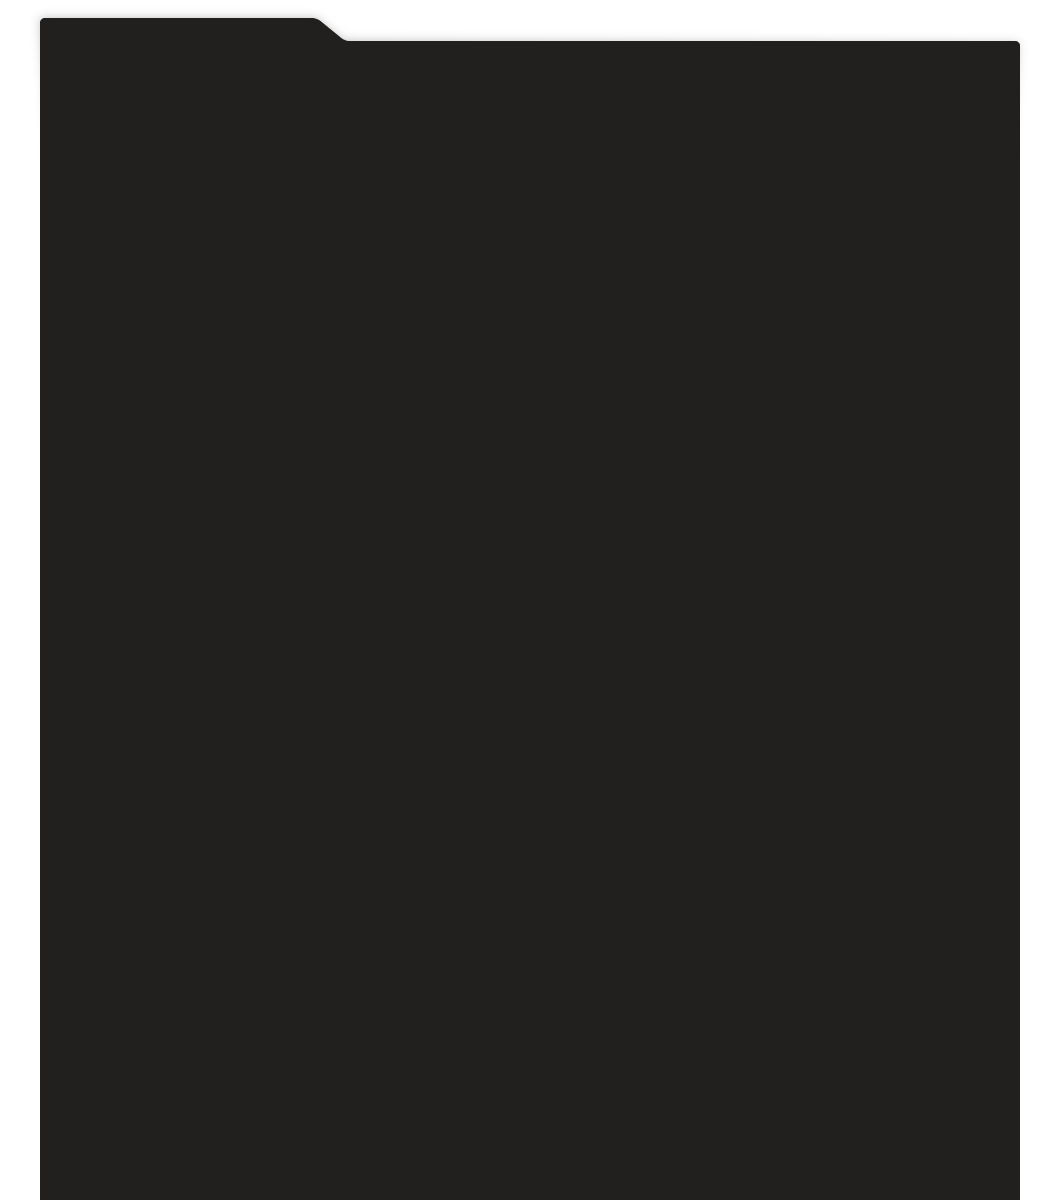
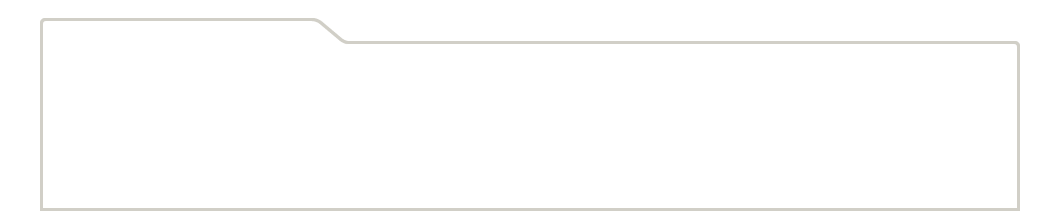
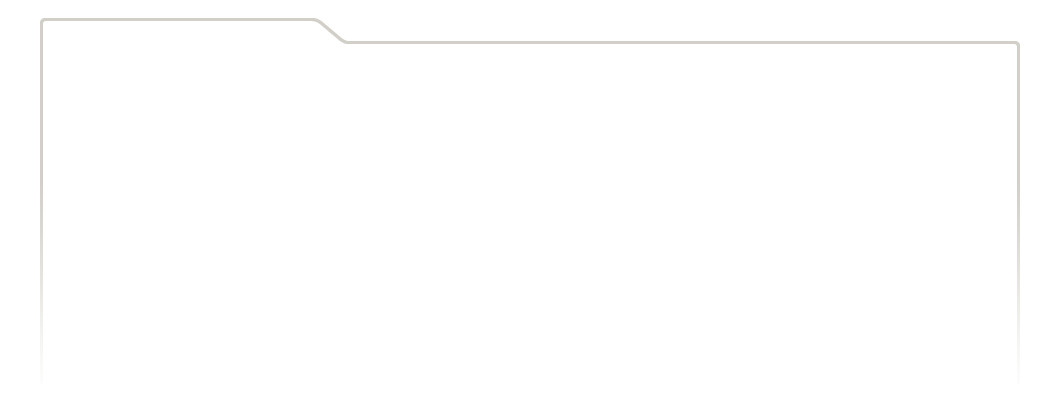
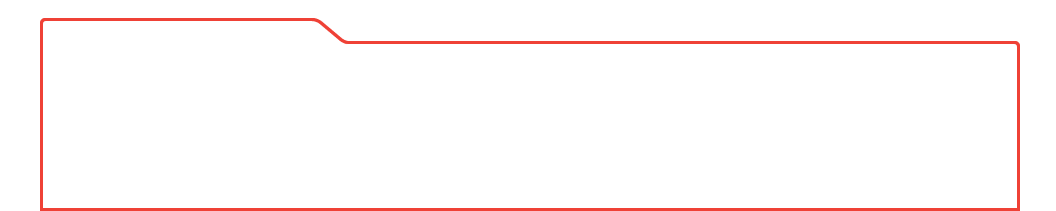
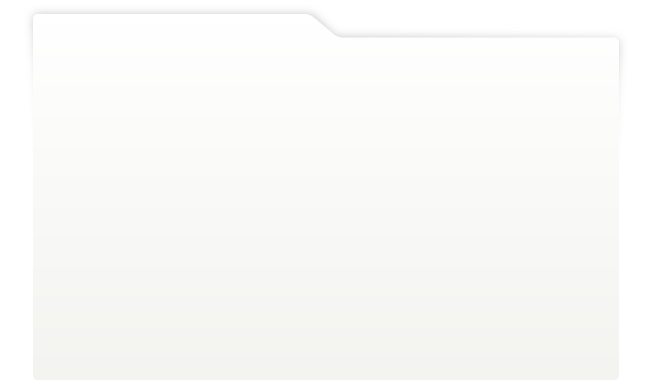
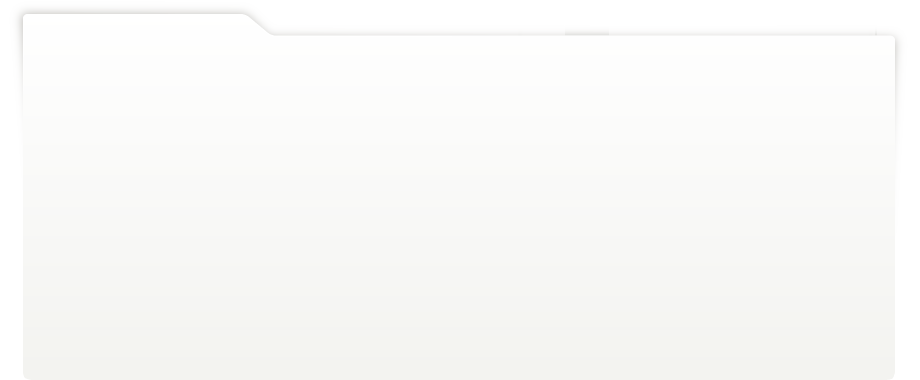
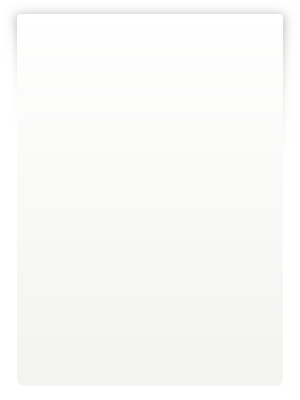
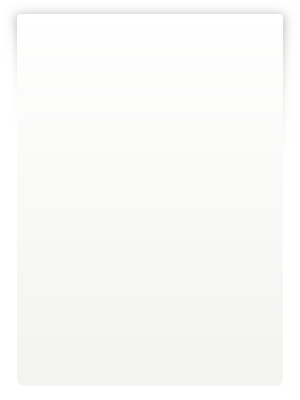
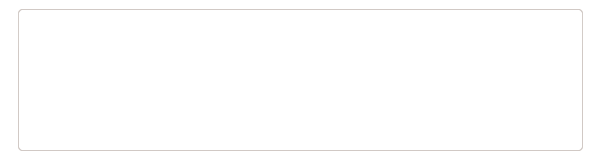
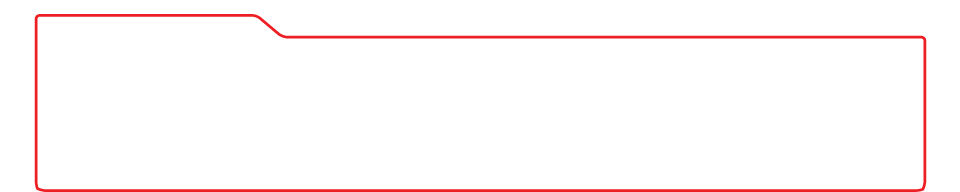
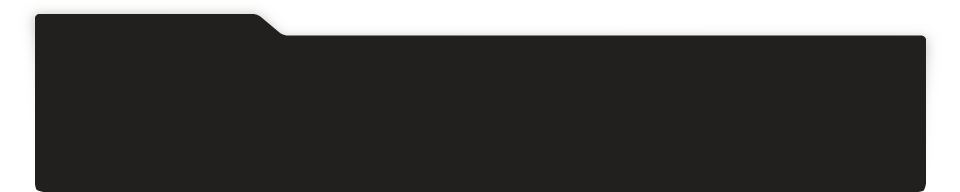
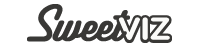
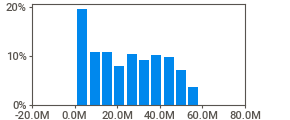
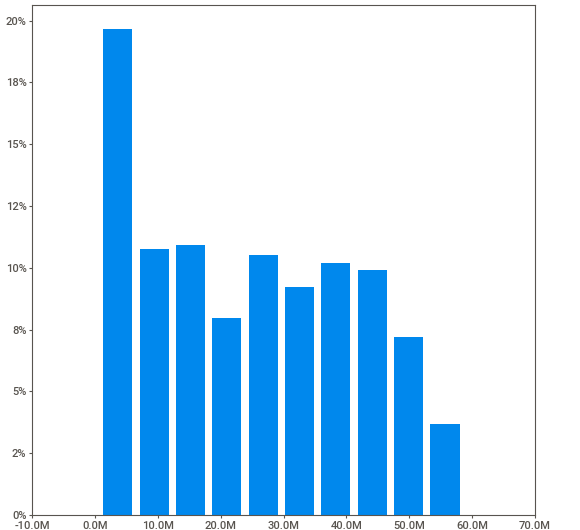
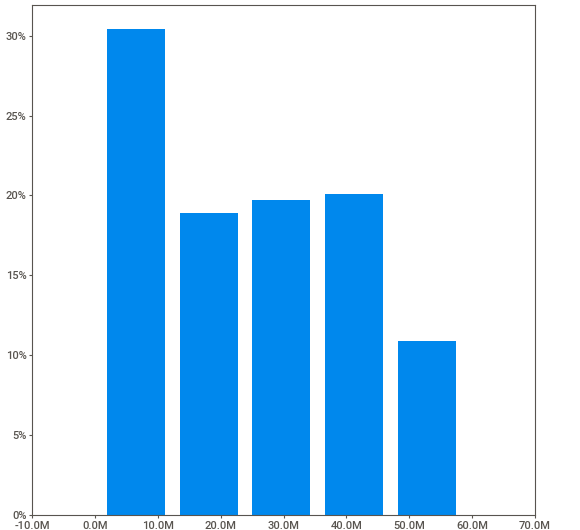
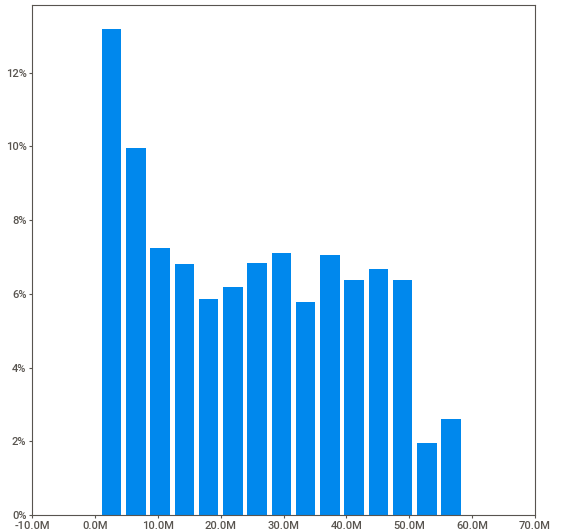
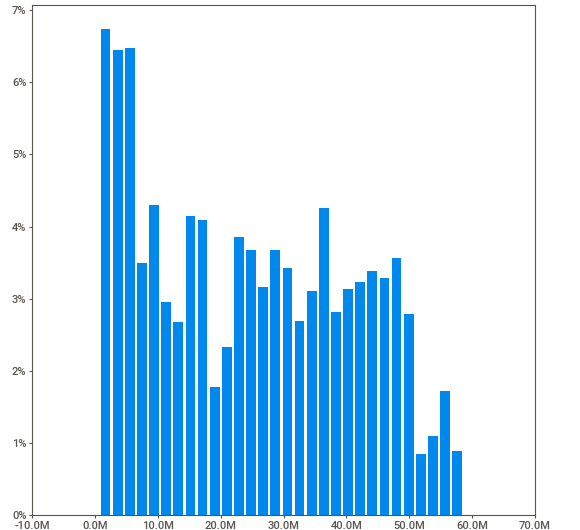
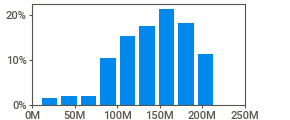
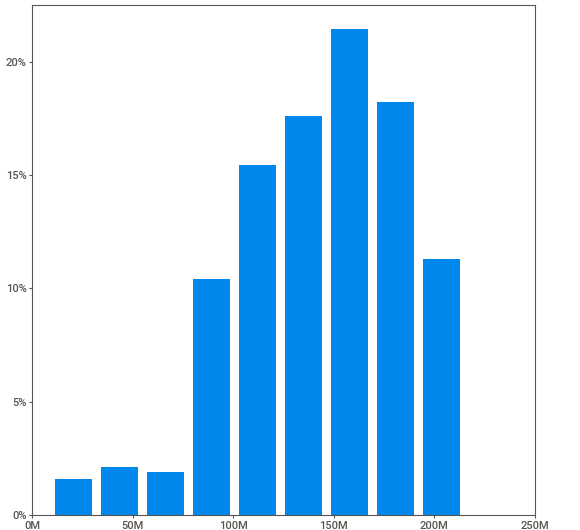
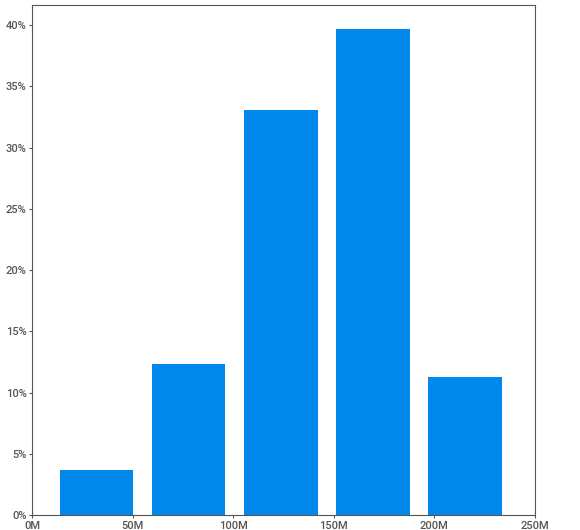
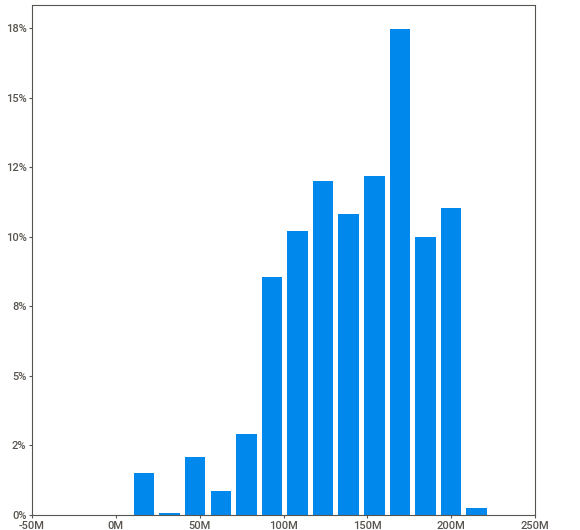
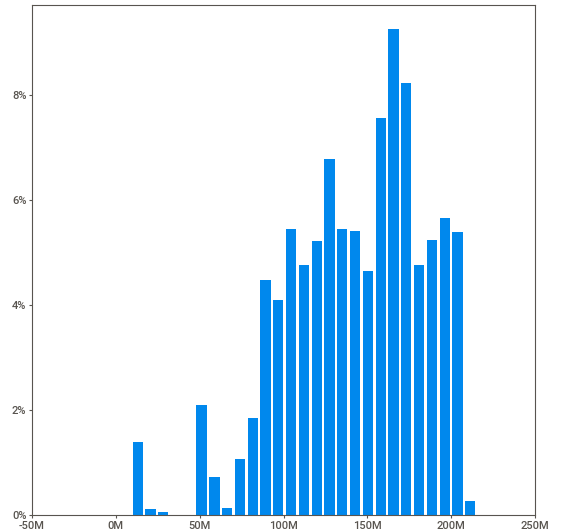
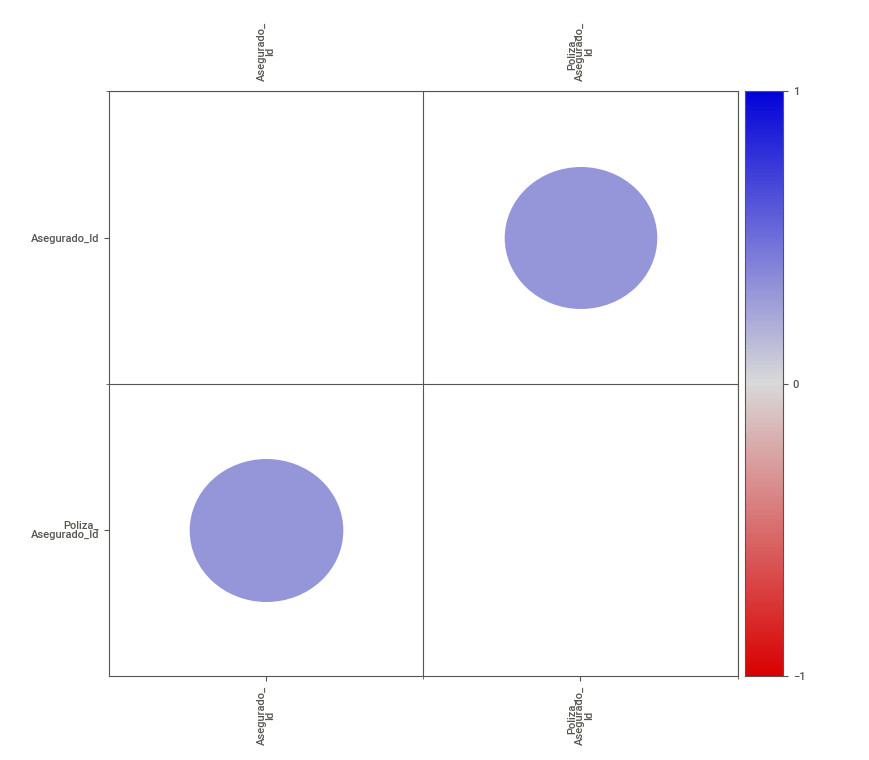
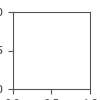

In [31]:
#Exploración rápida de las variables de bd_expuestos
rgd = sv.analyze(bd_expuestos)
rgd.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


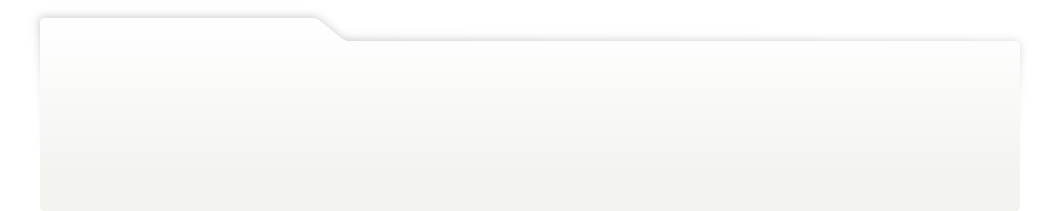
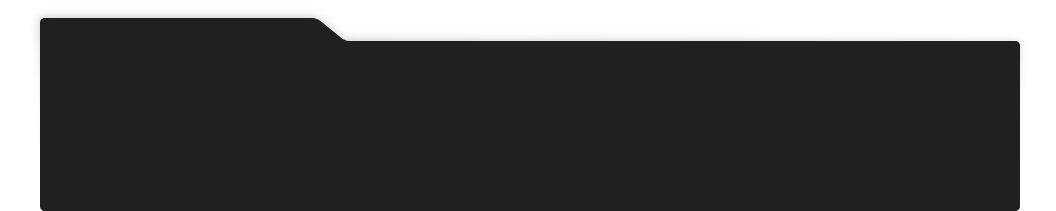
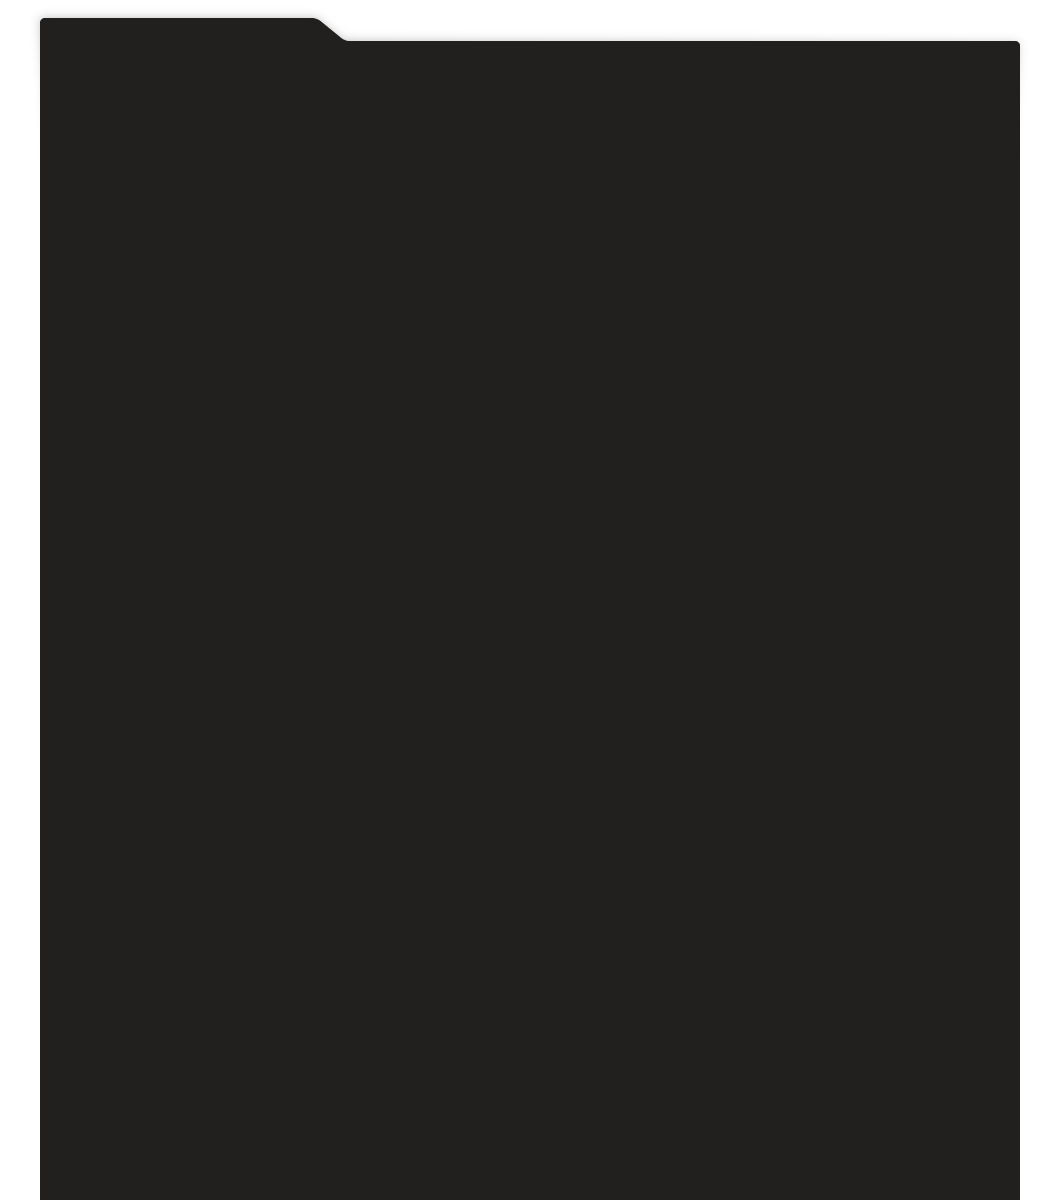
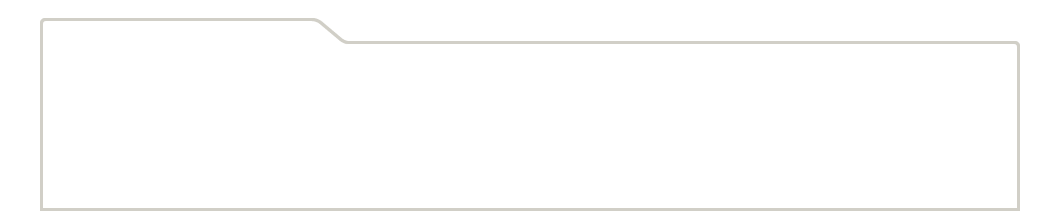
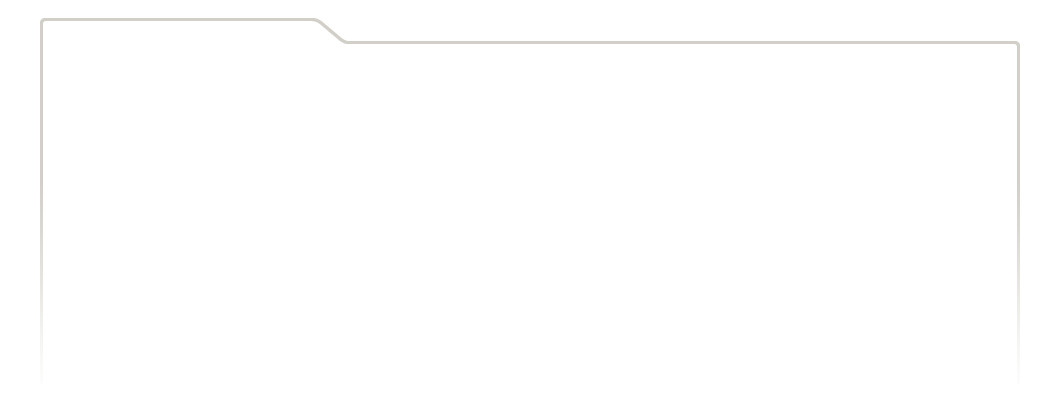
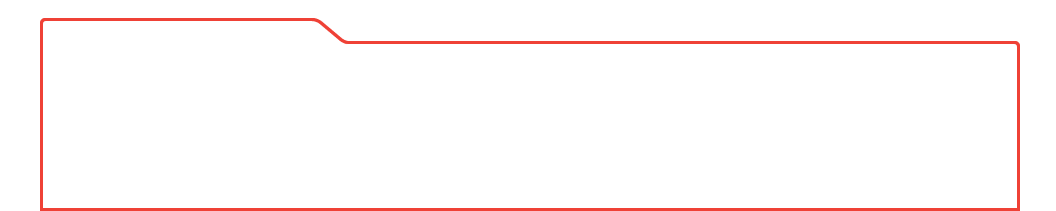
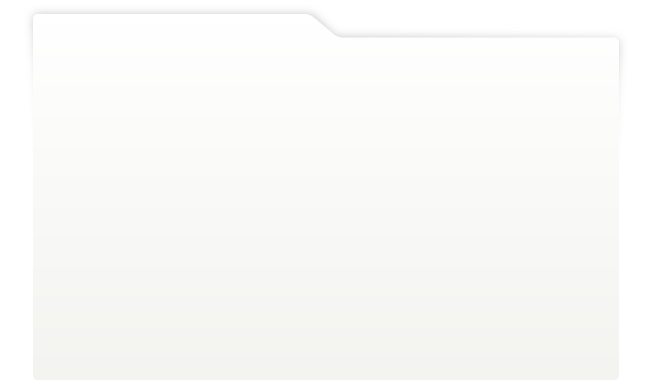
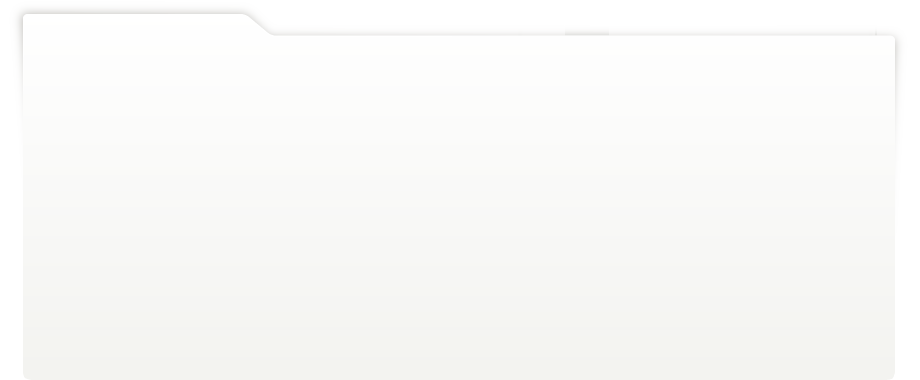
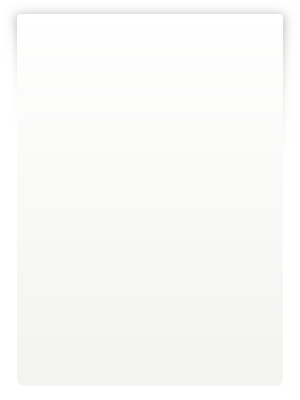
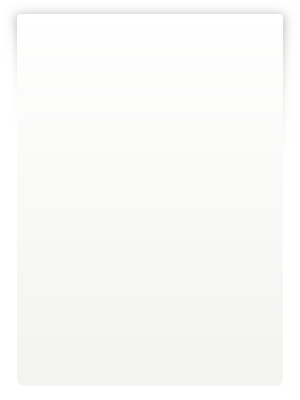
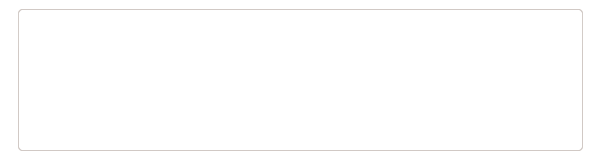
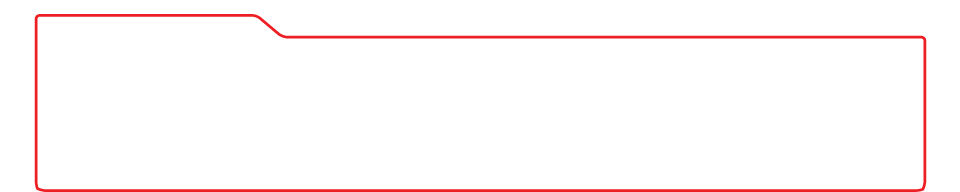
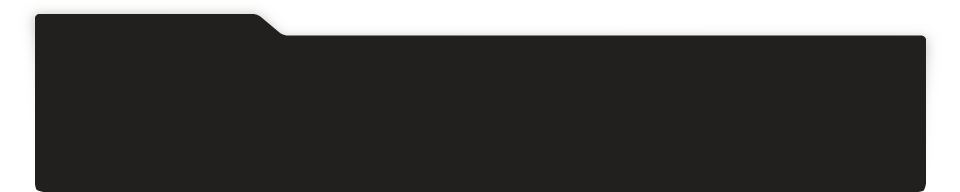
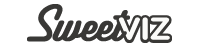
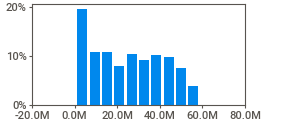
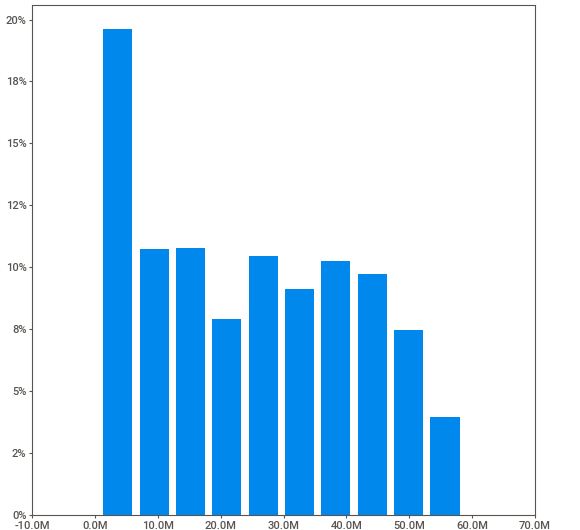
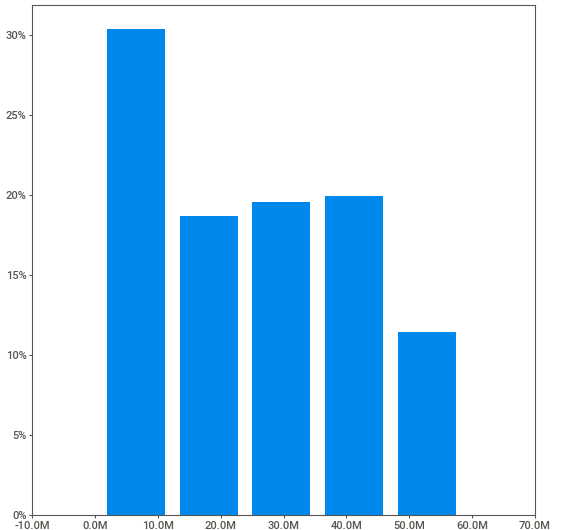
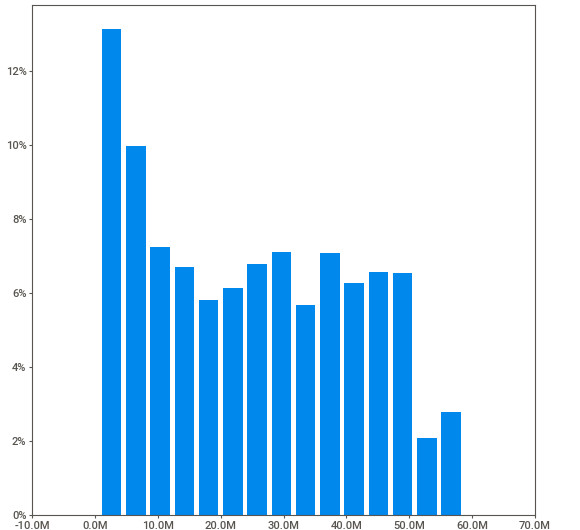
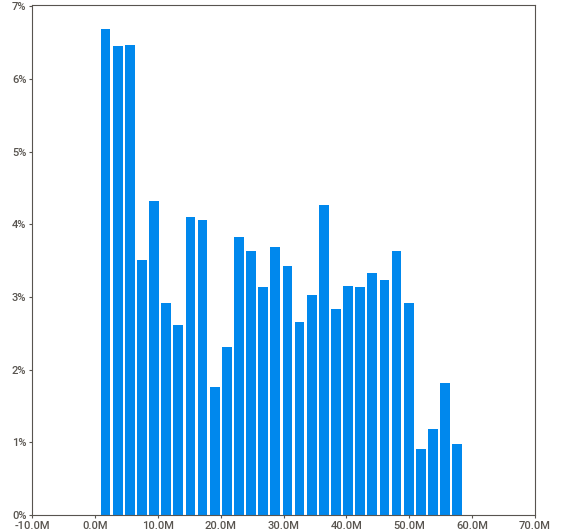
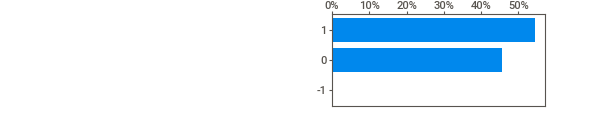
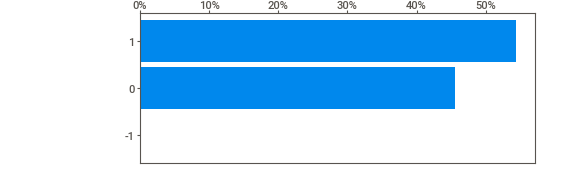
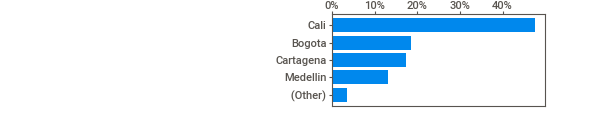
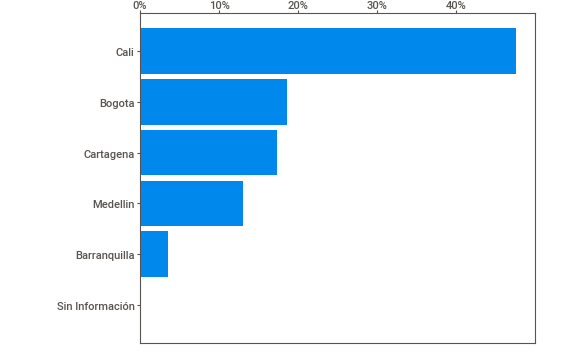
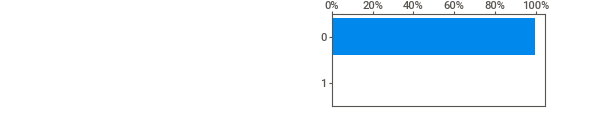
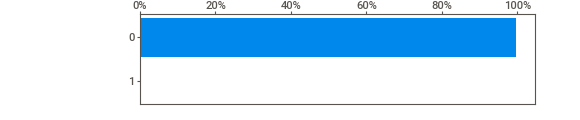
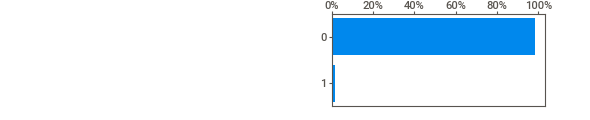
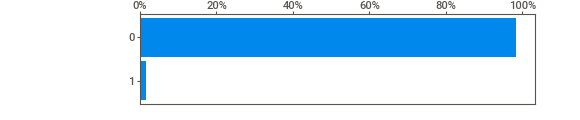
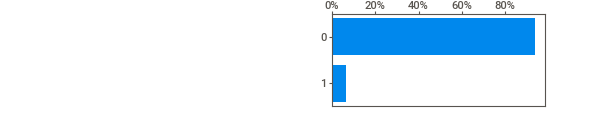
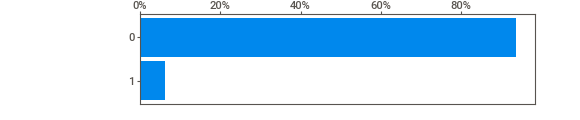
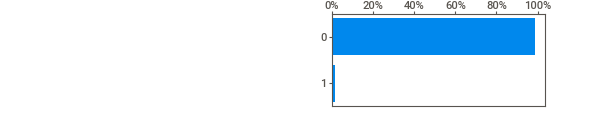
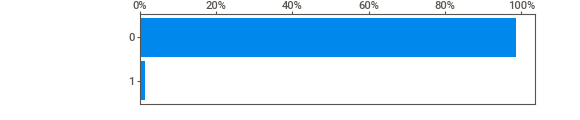
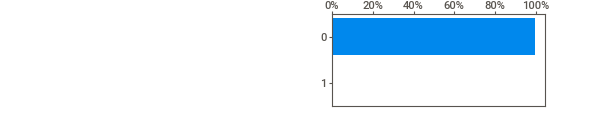
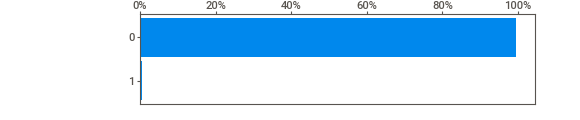
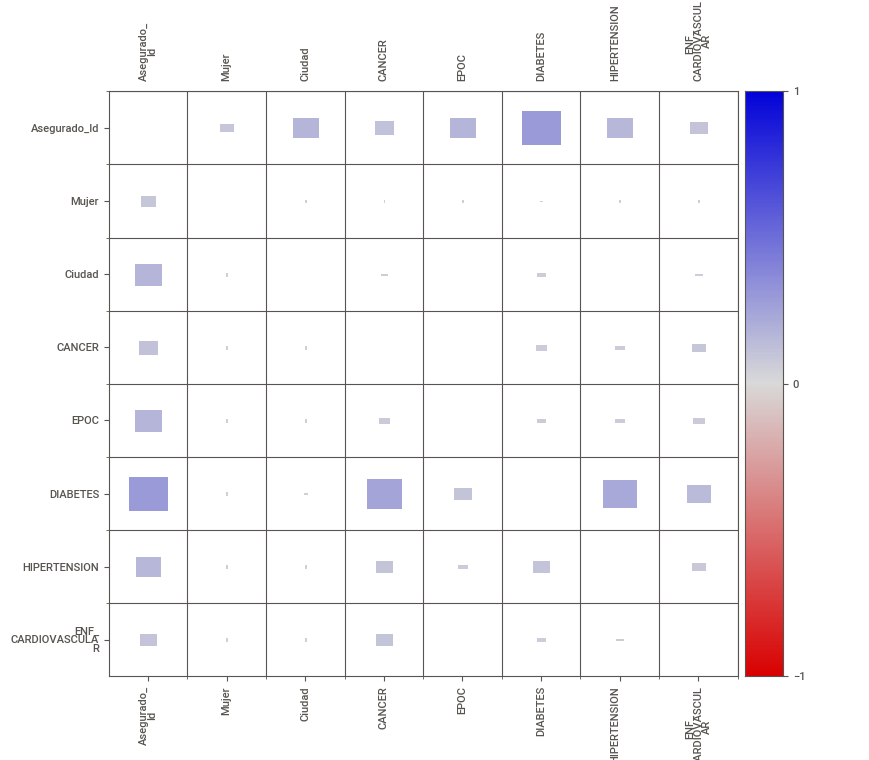
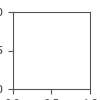

In [32]:
#Exploración rápida de las variables sociodemográficas
rgd = sv.analyze(bd_sociodem)
rgd.show_notebook()

In [33]:
#Exploración rápida de las variables de la base de siniestros
rgd = sv.analyze(bd_siniestros)
rgd.show_notebook()

NameError: name 'bd_siniestros' is not defined